In [34]:
#Step1: Import libraries
#Step2: Read .csv file and perfrom EDA, Data preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import  StandardScaler, OneHotEncoder


warnings.filterwarnings('ignore')

# Read .csv file
df=pd.read_csv('/content/ToyotaCorolla - MLR.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [25]:
# EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [26]:
df.shape

(1436, 11)

In [27]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [28]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [30]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

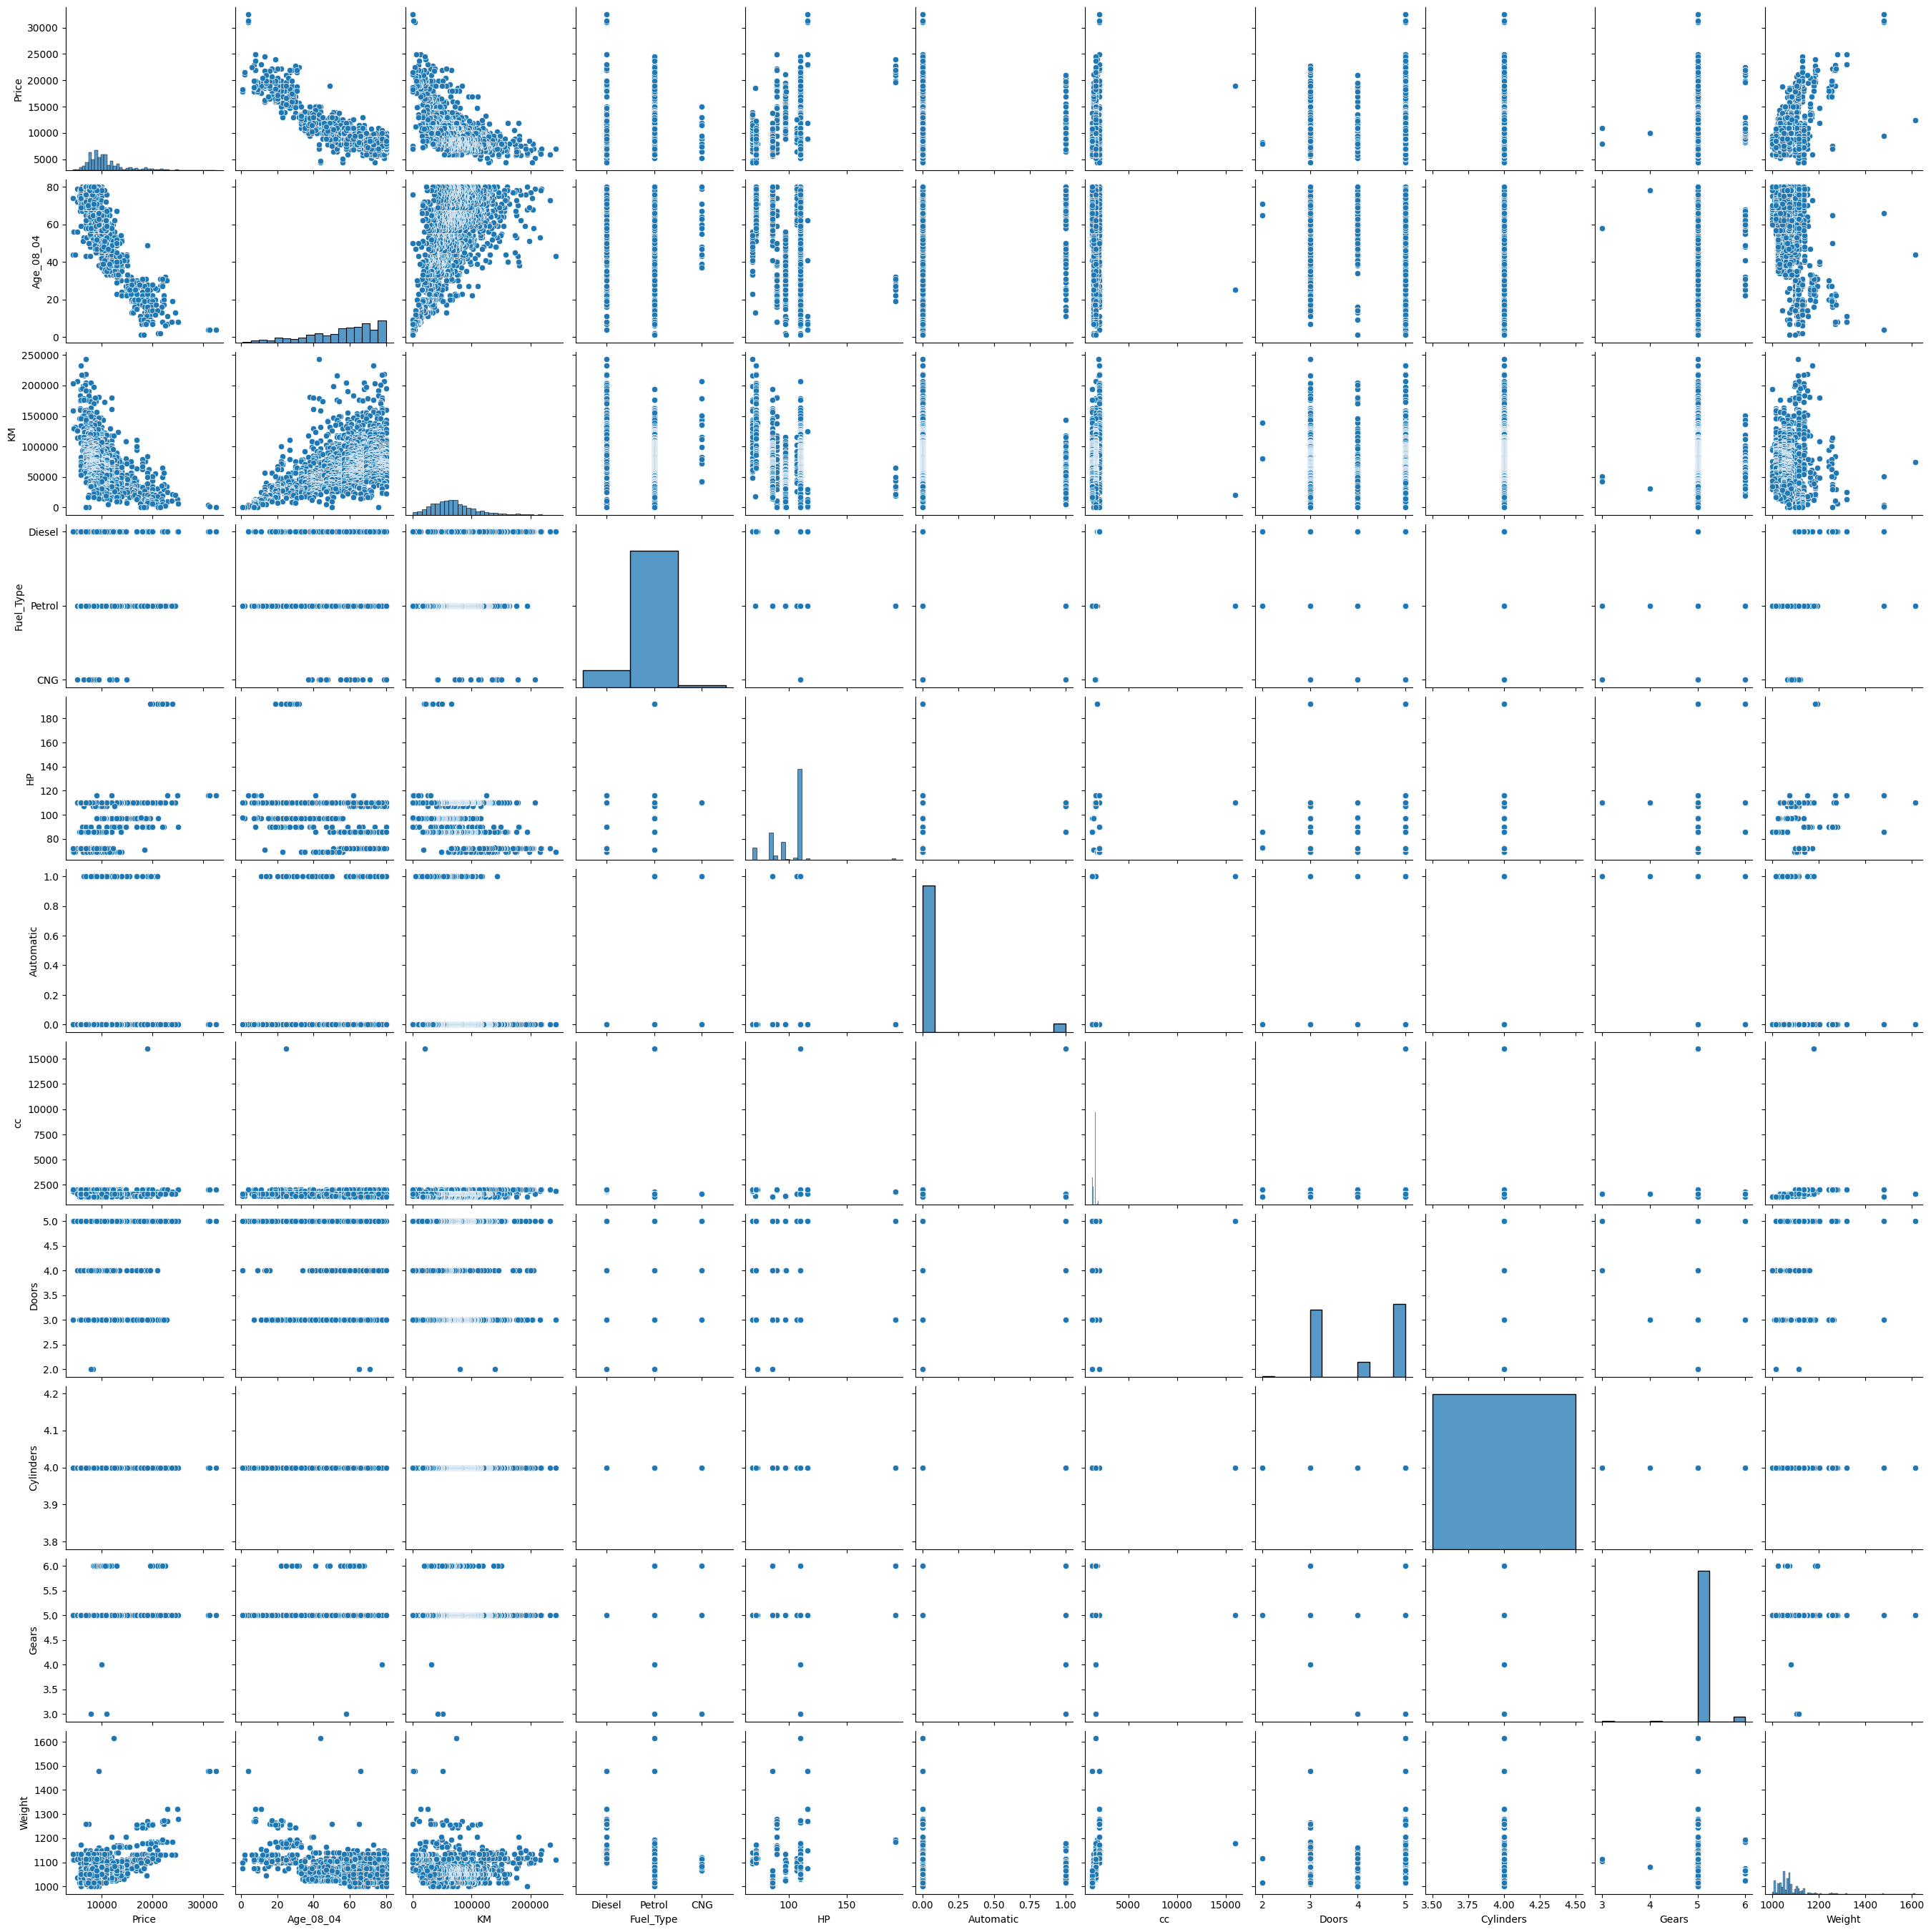

In [31]:
# Perform EDA - summary statistics and visualizations
print(df.describe())
sns.pairplot(df, vars=df)
plt.show()

In [35]:
# Handle missing values
df.dropna(inplace=True)

# Convert categorical variables to numeric using One-Hot Encoding
df = pd.get_dummies(df, columns=['Fuel_Type'])

In [36]:
# Split into features (X) and target (y)
X = df.drop(columns=['Price'])
y = df['Price']


In [37]:
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
# Step 3: Build Multiple Linear Regression Models
# Initialize Linear Regression model
model1 = LinearRegression()

# Fit the model on training data
model1.fit(X_train, y_train)

LinearRegression()

In [39]:
# Interpret coefficients
coefficients1 = pd.DataFrame({'Variable': X.columns, 'Coefficient': model1.coef_})
print("Model 1 Coefficients:")
print(coefficients1)

Model 1 Coefficients:
            Variable   Coefficient
0          Age_08_04 -1.208305e+02
1                 KM -1.623141e-02
2                 HP  1.403948e+01
3          Automatic  1.488309e+02
4                 cc -3.037219e-02
5              Doors -6.031097e+01
6          Cylinders  1.847411e-13
7              Gears  5.516007e+02
8             Weight  2.588496e+01
9      Fuel_Type_CNG -4.340867e+02
10  Fuel_Type_Diesel -5.026355e+02
11  Fuel_Type_Petrol  9.367222e+02


In [40]:
# Predict on test data
y_pred1 = model1.predict(X_test)

In [41]:
# Evaluate model performance
# Model 1
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)
print(f"Model 1 - MSE: {mse1}, R^2: {r2_1}")

Model 1 - MSE: 2203043.8231436997, R^2: 0.8348888040611084


In [42]:
# Model 2: Lasso Regression
# Initialize Lasso Regression model
model2 = Lasso(alpha=0.1)

# Fit the model on training data
model2.fit(X_train, y_train)

# Interpret coefficients
coefficients2 = pd.DataFrame({'Variable': X.columns, 'Coefficient': model2.coef_})
print("Model 2 Coefficients:")
print(coefficients2)

# Predict on test data
y_pred2 = model2.predict(X_test)

# Evaluate model performance
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)
print(f"Model 2 (Lasso) - MSE: {mse2}, R^2: {r2_2}")

Model 2 Coefficients:
            Variable  Coefficient
0          Age_08_04  -120.821247
1                 KM    -0.016240
2                 HP    14.048383
3          Automatic   146.704588
4                 cc    -0.030288
5              Doors   -60.272945
6          Cylinders     0.000000
7              Gears   548.984935
8             Weight    25.882137
9      Fuel_Type_CNG  -461.528745
10  Fuel_Type_Diesel  -535.398093
11  Fuel_Type_Petrol   903.018285
Model 2 (Lasso) - MSE: 2202923.027002638, R^2: 0.834897857351427


In [43]:
# Model 3: Ridge Regression
# Initialize Ridge Regression model
model3 = Ridge(alpha=1.0)

# Fit the model on training data
model3.fit(X_train, y_train)

# Interpret coefficients
coefficients3 = pd.DataFrame({'Variable': X.columns, 'Coefficient': model3.coef_})
print("Model 3 Coefficients:")
print(coefficients3)

# Predict on test data
y_pred3 = model3.predict(X_test)

# Evaluate model performance
mse3 = mean_squared_error(y_test, y_pred3)
r2_3 = r2_score(y_test, y_pred3)
print(f"Model 3 (Ridge) - MSE: {mse3}, R^2: {r2_3}")

Model 3 Coefficients:
            Variable  Coefficient
0          Age_08_04  -120.816402
1                 KM    -0.016299
2                 HP    14.295690
3          Automatic   148.637351
4                 cc    -0.031586
5              Doors   -59.687641
6          Cylinders     0.000000
7              Gears   539.729638
8             Weight    25.787864
9      Fuel_Type_CNG  -421.865983
10  Fuel_Type_Diesel  -496.652209
11  Fuel_Type_Petrol   918.518192
Model 3 (Ridge) - MSE: 2198251.1073328047, R^2: 0.8352480030162173


In [44]:
# Step 4: Evaluate Model Performance
# We evaluated the models using Mean Squared Error (MSE) and
# R-squared(r2) score on the testing dataset.